In [9]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 150, n_features = 2, centers = 3, cluster_std = 0.5, shuffle = True, random_state = 0)

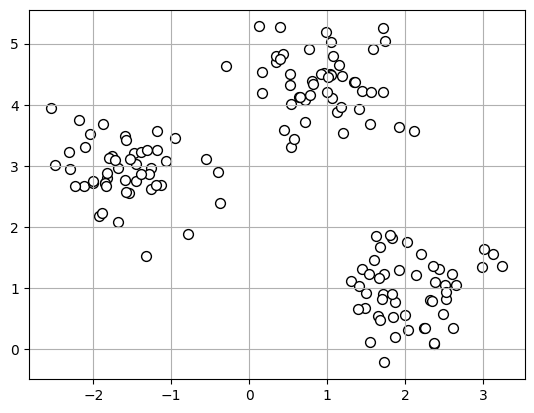

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c='white', marker = 'o', edgecolor='black',s=50)
plt.grid()
plt.show()

In [14]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(X)

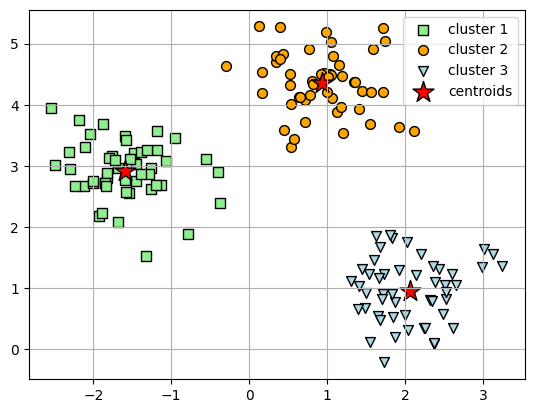

In [15]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s = 50, c = 'lightgreen', marker = 's', edgecolors='black', label = 'cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 50, c = 'orange', marker = 'o', edgecolors='black', label = 'cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 50, c = 'lightblue', marker = 'v', edgecolors='black', label = 'cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 250, c = 'red', marker = '*', edgecolors='black', label = 'centroids')

plt.legend(scatterpoints = 1)
plt.grid()
plt.show()

In [17]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


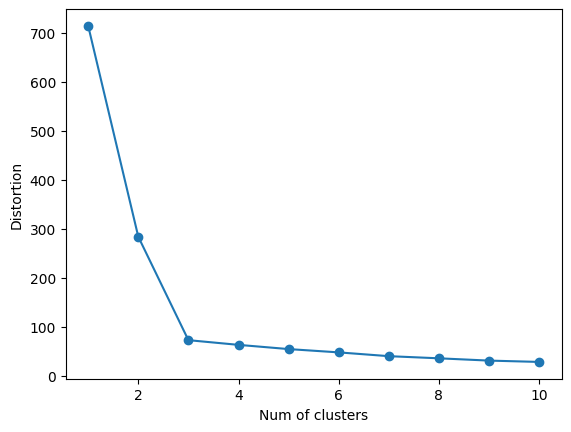

In [19]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)


plt.plot(range(1,11), distortions, marker = 'o')
plt.xlabel('Num of clusters')
plt.ylabel('Distortion')
plt.show()

In [20]:
km = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(X)

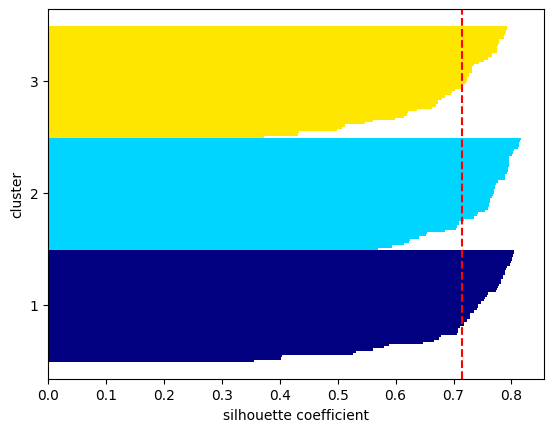

In [21]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric = 'euclidean')


y_ax_lower, y_ax_upper = 0,0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals, height = 1.0, edgecolor = 'none', color = color)
    yticks.append((y_ax_lower + y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('cluster')
plt.xlabel('silhouette coefficient')
plt.show()
